In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [20]:
#raw_data = pd.read_csv(r"C:\Users\Dreamcore\OneDrive\Desktop\MAL Anime Top 10000 Details.csv.zip")
raw_data = pd.read_csv(r"MAL Anime Top 10000 Details.csv.zip")
new_data = pd.DataFrame(raw_data[["Anime Title","Type","Episodes","Aired","Producers","Studios",
                                  "Source","Genres","Score","Members","Favorites"]])
TV_data = new_data.loc[new_data["Type"]=="TV"]
Movie_data = new_data.loc[new_data["Type"]=="Movie"]

Anime Title - title of the anime

Type - Type of anime(OVA/TV/etc)

Episodes - number of episodes

Aired - time frame of airing

Producers - producers of the anime

Studios - studio responsible for anime creation

Source - source from which anime was adapted from

Genres - genre of anime

Score - MAL score for the anime
to perform uni-varaiate analysis

Members - number of members registered for anime
to perform uni-varaiate analysis

Favourites - number of members who favourited the anime
to perform uni-varaiate analysis

TO DO

Create a new column as percentage of favourites out of all members DONE

Use studio/source/genre as entry varaibles

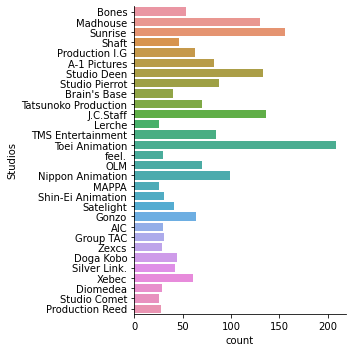

In [21]:
sb.catplot(y = 'Studios', data = TV_data[TV_data.groupby('Studios').Studios.transform('count') > 25], kind='count')

In [22]:
TV_Studios_array=TV_data["Studios"].unique()
np.where(TV_Studios_array == TV_data["Studios"].iloc[27])[0][0]

11

In [23]:
TV_data["Genres"].iloc[0]

'Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen'

## 020323 Ezra

### - Fav% and Favourites not good dep vars, let's try Score or Members
### - Episodes is a column of strings
### - Producers and Studios have some NULL
### - Convert all categorical string columns to float (0,1,2 etc) else decTree cannot run

In [51]:
source = TV_data['Source']
genres = TV_data['Genres']
score = TV_data['Score']
members = TV_data['Source']
fav = TV_data['Favorites']

In [52]:
TV_data.insert(loc=11, column='Fav%', value=round(TV_data['Favorites']*100/TV_data['Members'], 3))

ValueError: cannot insert Fav%, already exists

In [53]:
TV_data.head()

,Anime Title,Type,Episodes,Aired,Producers,Studios,Source,Genres,Score,Members,Favorites,Fav%
0,Fullmetal Alchemist: Brotherhood,TV,64,"Apr 5, 2009 to Jul 4, 2010","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,"Action, Military, Adventure, Comedy, Drama, Ma...",9.22,2025613,167812,8.285
1,Steins;Gate,TV,24,"Apr 6, 2011 to Sep 14, 2011","Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,Visual novel,"Thriller, Sci-Fi",9.12,1636151,139909,8.551
2,Gintama°,TV,51,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",9.11,363879,10353,2.845
3,Hunter x Hunter (2011),TV,148,"Oct 2, 2011 to Sep 24, 2014","VAP, Nippon Television Network, Shueisha",Madhouse,Manga,"Action, Adventure, Fantasy, Shounen, Super Power",9.11,1459320,130492,8.942
5,Gintama',TV,51,"Apr 4, 2011 to Mar 26, 2012","TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,Manga,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",9.08,337198,6013,1.783


In [54]:
score.describe()

count    3681.000000
mean        6.949992
std         0.728457
min         5.250000
25%         6.430000
50%         6.930000
75%         7.440000
max         9.220000
Name: Score, dtype: float64

In [55]:
TV_data['Fav%'].describe()

count    3681.000000
mean        0.612681
std         0.786599
min         0.000000
25%         0.185000
50%         0.370000
75%         0.701000
max         9.122000
Name: Fav%, dtype: float64

In [45]:
type(TV_data['Episodes'][0])

str

In [56]:
TV_data['Favorites'].describe()

count      3681.000000
mean       1730.505026
std        7687.333036
min           0.000000
25%          12.000000
50%          86.000000
75%         589.000000
max      167812.000000
Name: Favorites, dtype: float64

In [48]:
TV_data['Members'].describe()

count    3.681000e+03
mean     1.119105e+05
std      2.175029e+05
min      2.920000e+02
25%      4.691000e+03
50%      2.736200e+04
75%      1.178950e+05
max      2.331023e+06
Name: Members, dtype: float64

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree 

def decTree(pred, res, depth):
    X_train, X_test, Y_train, Y_test = train_test_split(pred, res, test_size = 0.2)    
    dectree = DecisionTreeClassifier(max_depth = depth)
    dectree.fit(X_train, Y_train)
    Y_train_pred = dectree.predict(X_train)
    Y_test_pred = dectree.predict(X_test)
    c = ''.join(list(pred.columns))
    d = ''.join(list(res.columns))
    cm = confusion_matrix(Y_train, Y_train_pred)
    TP = cm[1][1]/(cm[1][1] + cm[1][0])
    FP = cm[0][1]/(cm[0][1] + cm[0][0])
    cm1 = confusion_matrix(Y_test, Y_test_pred)
    TP1 = cm1[1][1]/(cm1[1][1] + cm1[1][0])
    FP1 = cm1[0][1]/(cm1[0][1] + cm1[0][0])
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, Y_train))
    print("True Positive Rate \t:", TP)
    print("False Positive Rate\t:", FP)
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, Y_test))
    print("True Positive Rate \t:", TP1)
    print("False Positive Rate\t:", FP1)
    print()
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    f = plt.figure(figsize=(12,12))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names=[c], 
              class_names=["Ordinary", d])

In [61]:
decTree(members, source,2)

ValueError: could not convert string to float: 'Unknown'

In [62]:
TV_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3681 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Anime Title  3681 non-null   object 
 1   Type         3681 non-null   object 
 2   Episodes     3681 non-null   object 
 3   Aired        3681 non-null   object 
 4   Producers    3049 non-null   object 
 5   Studios      3476 non-null   object 
 6   Source       3681 non-null   object 
 7   Genres       3681 non-null   object 
 8   Score        3681 non-null   float64
 9   Members      3681 non-null   int64  
 10  Favorites    3681 non-null   int64  
 11  Fav%         3681 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 502.9+ KB
